## importing liberaries

In [118]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### importing dataset

In [119]:
df = pd.read_excel("/content/WAR data set.xlsx")
df.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6


# dependent and independent variables

In [120]:
X = df.drop('Water Absorption reduction (%)', axis = 1)
y = df['Water Absorption reduction (%)']

###rain_Test Split


In [121]:
# Train _Test Split
from sklearn.model_selection import train_test_split

# First split: training and test+validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=64) # 20% for test+validation

# Second split: validation and test sets from the 20%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64) # 50% of the 20% is 10% for testing

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


# Standardization

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform (X)
X=pd.DataFrame(X,columns=['Temprature(℃)','PH', 'CaCl₂ (mol/L)', 'Soaking Time (days)', 'Converted Enzyme Conc (g/L)', 'Urea Conc (g/L)	'])
X.head()


,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t
0,0.816466,1.296392,-1.176596,-0.444484,-0.483277,-0.764817
1,-0.524001,0.083290,-1.483405,-0.444484,-1.968972,-0.764817
2,0.146233,1.296392,0.105635,-0.444484,-0.483277,-0.764817
3,0.146233,1.296392,0.105635,0.433599,-0.483277,-0.764817
4,0.146233,1.296392,0.105635,1.092162,-0.483277,-0.764817


## Decission tree model

In [123]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion=('squared_error'), max_depth=4, min_samples_split=30, max_features=2, random_state=40)

In [124]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_split=30,
                      random_state=40)

In [125]:
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

In [126]:
y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)
y_pred_val=DTR.predict(X_val)


### Evaluating Model

In [127]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [128]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, DTR.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, DTR.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, DTR.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, DTR.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, DTR.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, DTR.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, DTR.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, DTR.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, DTR.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, DTR.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, DTR.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, DTR.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 9.4991
The MSE on the training dataset is: 90.2323
The MAE on the training daset is: 7.0428
The r2_score on the training dataset is: 0.5786
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 13.2777
The MSE on the testing dataset is: 176.2967
The MAE on the testing dataset is: 8.9489
The r2_score on the testing dataset is: 0.4059
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 9.6675
The MSE on the validation dataset is: 93.4614
The MAE on the validation dataset is: 8.0936
The r2_score on the validation dataset is: 0.7391


### hyperparameter tunning  (optimization)

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param = { 'criterion':['squared_error', 'absolute_error'],
          'splitter':['best'],
          'max_depth':range(2,25),
          'max_features':range(1,6),
          'min_samples_split': range(1,10),
          'min_samples_leaf': range(1,2)
                    }

In [131]:
gcv=GridSearchCV(estimator=DTR ,param_grid=param ,n_jobs=-1,cv=10)

In [132]:
gcv.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=4, max_features=2,
                                             min_samples_split=30,
                                             random_state=40),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(2, 25), 'max_features': range(1, 6),
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best']})

In [133]:
gcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [134]:
y_pred_train = gcv.predict(X_train)
y_pred_test = gcv.predict(X_test)
y_pred_val=gcv.predict(X_val)

### Evaluating The optimized model

In [135]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [136]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, gcv.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, gcv.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, gcv.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, gcv.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, gcv.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, gcv.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, gcv.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, gcv.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, gcv.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, gcv.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, gcv.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, gcv.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 2.0262
The MSE on the training dataset is: 4.1054
The MAE on the training daset is: 1.0115
The r2_score on the training dataset is: 0.9808
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 4.1177
The MSE on the testing dataset is: 16.9554
The MAE on the testing dataset is: 2.9075
The r2_score on the testing dataset is: 0.9429
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 3.0910
The MSE on the validation dataset is: 9.5545
The MAE on the validation dataset is: 2.4796
The r2_score on the validation dataset is: 0.9733


#DT graph

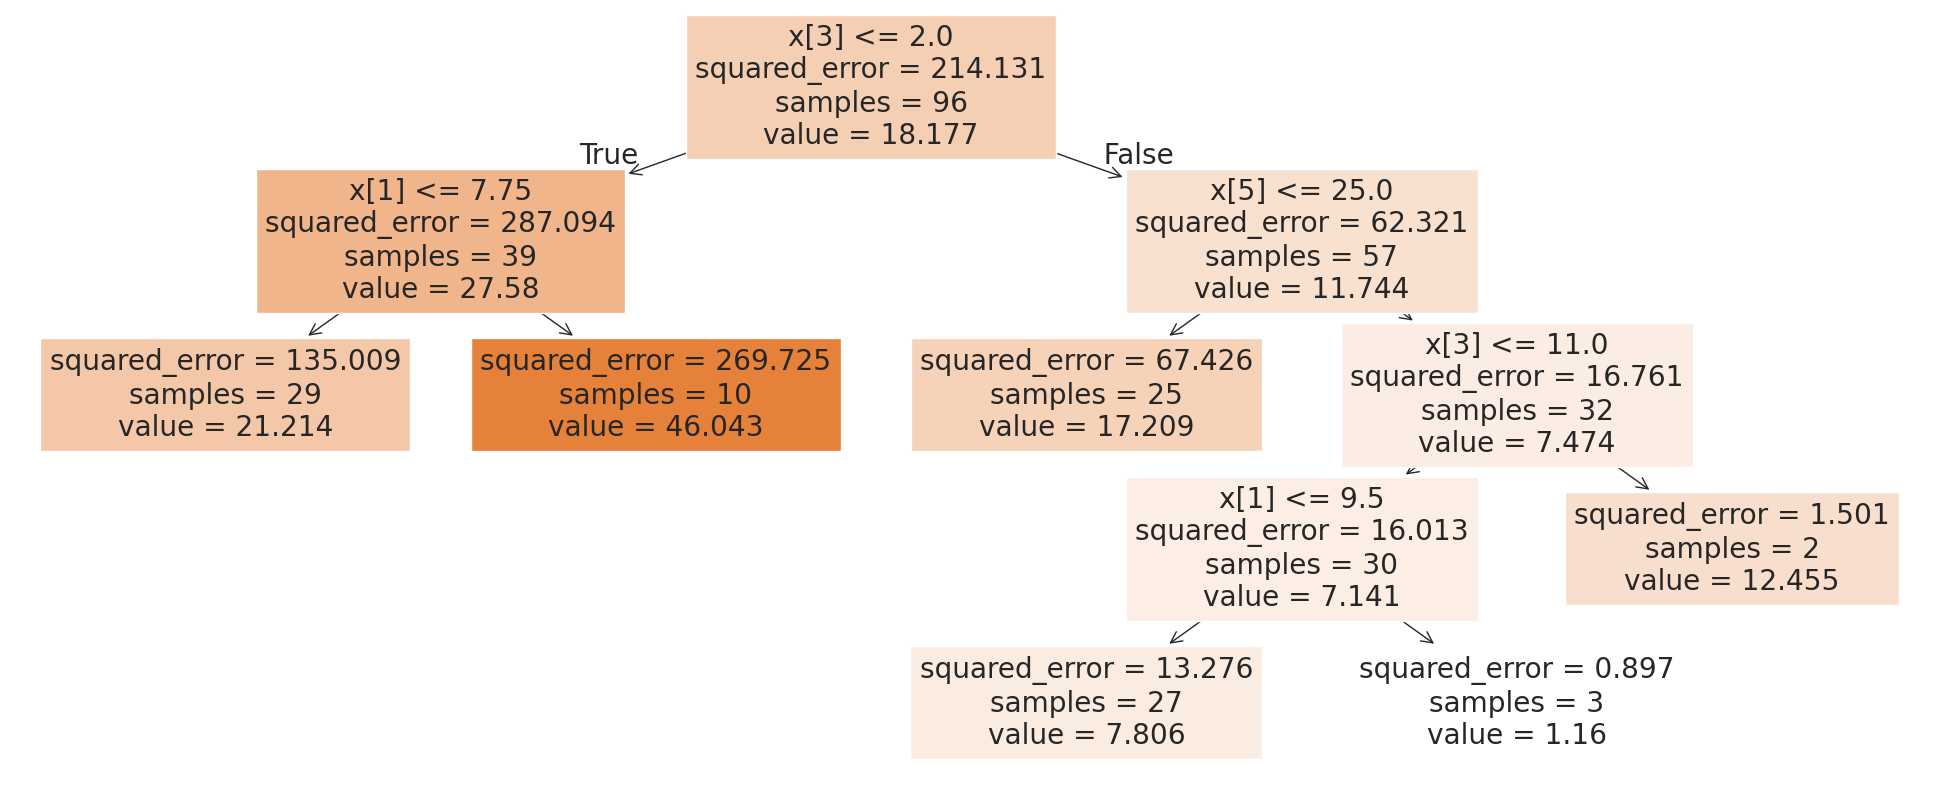

In [137]:
from sklearn.tree import plot_tree
plt.figure(figsize =(25,10))
fontsize=50
max_depth=6
plot_tree(DTR,filled = True)
plt.show()

### Feature importace for DT regression

In [138]:
gcv.best_estimator_.feature_importances_

array([0.00402438, 0.30849149, 0.10880276, 0.04649001, 0.07952394,
       0.45266742])

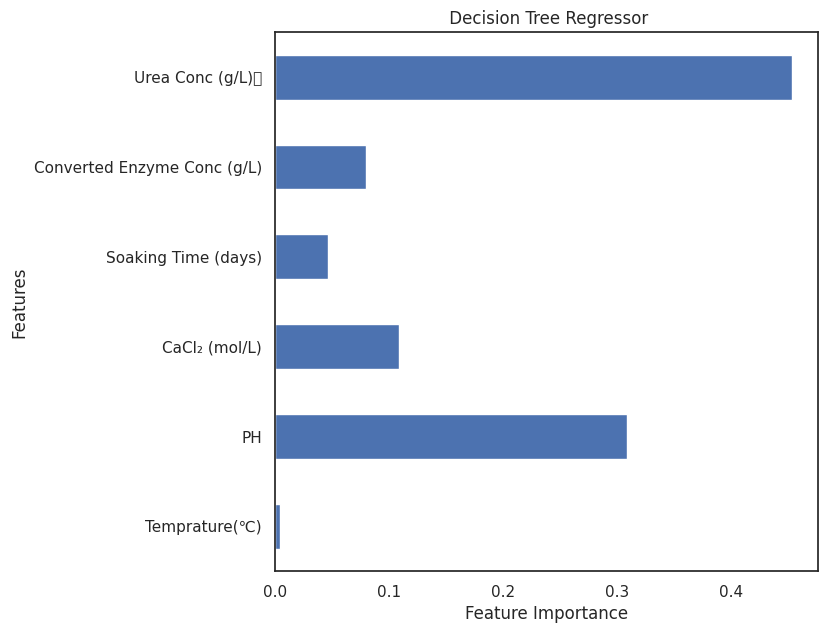

In [139]:
importances = pd.Series(gcv.best_estimator_.feature_importances_ , index=X.columns)
sns.set_style('white')
importances.plot(kind = 'barh', figsize=(7,7))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(" Decision Tree Regressor")
plt.show()

### Actual Vs Predicted Capacity

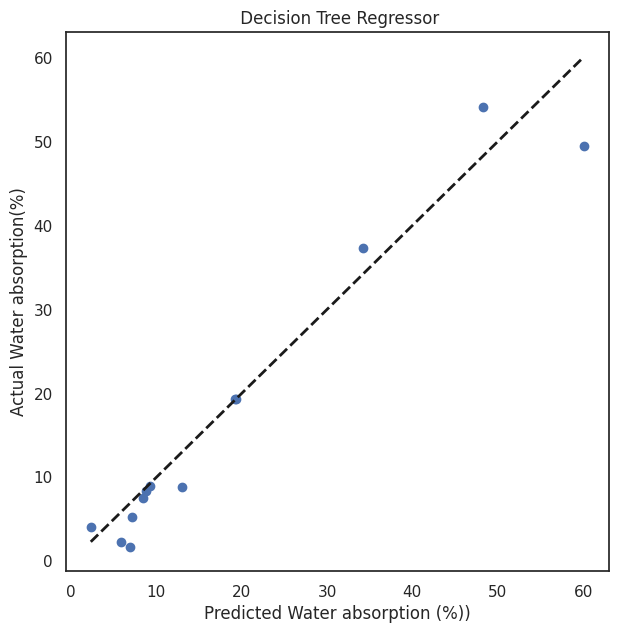

In [140]:
plt.figure(figsize=(7,7))
sns.set_style("white")
plt.xlabel("Predicted Water absorption (%))")
plt.ylabel("Actual Water absorption(%)")
plt.title(" Decision Tree Regressor")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()